# Exercise Sheet 1



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [120]:
import os
import os.path
import sys
# python_package_path = os.path.split(sys.executable)[0] + "\\Lib\\site-packages\\"
# sys.path.append(python_package_path)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

file_dir = os.path.abspath(r'..\\Blatt 1') + "\\"
# file_dir = 'D:\\Dropbox\\Dropbox\\Master Theoretische Informatik\\Very Deep Learning\\WiSe 18_19\\VDL_Python\\Blatt 1\\'
# print(file_dir)
csv_path = file_dir + 'covertype.csv'
# print(csv_path)
file = pd.read_csv(file_dir + 'covertype.csv')
# print(file.columns)



values = np.array(file)
num_col = values[0].__len__()

num_features = 12
# num_features = num_col

header = file.columns.values[1:num_col]
# Describing which columns are features and what column is the label column
print ("The columns 2, 3, 4, ...,", num_features-1 , "are the features and the last column describes the labels")
# Notice, the first column is just an index. Therefore it does not contain to the features


df = pd.DataFrame(columns=header, index=values[:,0], data=values[:,list(range(1, num_col))])


train, test = train_test_split(df, test_size=0.3)
train = np.array(train)
test = np.array(test)
# print(train)
x_train = train[:,:num_features-2]
x_test = test[:,:num_features-2]
print(x_train)
y_train = train[:, num_col-2]
y_test = test[:,num_col-2]






The columns 2, 3, 4, ..., 11 are the features and the last column describes the labels
[[2235   93   16 ...  213   94 1679]
 [2005   29    6 ...  226  144  376]
 [2915   69   12 ...  216  113  295]
 ...
 [2363  176   14 ...  247  150  994]
 [2910  323   10 ...  230  174  765]
 [3109   26    7 ...  225  144 2962]]


### Train a simple deep neural network
- Use Keras to define a simple Multi-Layer Perceptron with at least 3 layers and a Softmax classifier
    - You have to explicitly give the input shape of the first layer
    - The other layer shapes are inferred
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Define 'accuracy' as performance metric when compiling the network model
- Train the MLP with x_train, y_train
    - Make sure to save the training history for later assessment
- Evaluate the performance on x_test, y_test

In [123]:
import keras
import os



# For Reproducing Traings etc.
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# ---------------- Setting Hyperparameter ----------------
batch_size = 32
epochs = 10      # we choose the number so small, because we train later much longer to get a nicer visualization
lr = 0.01
decay = 1e-12            # decay works over batch-update, i.e. after each batch, the lr decreases
# --------------------------------------------------------


print(y_train.shape)

number_of_classes = np.max([np.max(y_test), np.max(y_train)]) + 1
print(number_of_classes)


print(y_train.shape)

print(y_train)

for i in range(len(y_train)):
    y_train[i] -= 1

print("\n\n\n", y_train)

for i in range(len(y_test)):
    y_test[i] -= 1

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(input_dim=num_features-2, units=1024, activation='tanh'))
    model.add(keras.layers.Dense(units=512, activation='tanh'))
    model.add(keras.layers.Dense(units=256, activation='tanh'))
    model.add(keras.layers.Dense(units=128, activation='tanh'))
    model.add(keras.layers.Dense(units=64, activation='tanh'))
    model.add(keras.layers.Dense(units=32, activation='tanh'))
    model.add(keras.layers.Dense(units=number_of_classes, activation='softmax'))

    opt = keras.optimizers.adagrad(lr=lr)       
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


model = create_model()

print(type(x_train))

one_hot_labels_train = keras.utils.to_categorical(y_train, num_classes=number_of_classes)
one_hot_labels_test = keras.utils.to_categorical(y_test, num_classes=number_of_classes)

# Train the model
train_history = model.fit(x_train, one_hot_labels_train, epochs=epochs, batch_size=batch_size)
loss_history = train_history.history["loss"]
acc_history = train_history.history["acc"]

# print(loss_history)
# print(acc_history)

log_dir = file_dir + "\\LogFiles\\"
if not (os.path.exists(log_dir)):
    os.makedirs(log_dir)

# Write Header of Log_File:
file = open(log_dir + "train_log.csv", "w+")
file.write("Epoch\tLoss\tAccuracy\n")
file.close()
    
# Write Loss and Accuracy:
file = open(log_dir + "train_log.csv", "a+")
for i in range(epochs):
    file.write(str(i) + "\t" + str(loss_history[i]) + "\t" + str(acc_history[i]) + "\n")
    
file.close()    

# Test the model
score = model.evaluate(x_test, one_hot_labels_test, batch_size=batch_size)
print(score)



(10584,)
6
(10584,)
[ 2  2 -1 ...  4  3 -1]



 [ 1  1 -2 ...  3  2 -2]
<class 'numpy.ndarray'>
Epoch 1/10
10584/10584 [==============================] - 5s 490us/step - loss: 1.7336 - acc: 0.2799
Epoch 2/10
10584/10584 [==============================] - 4s 421us/step - loss: 1.5897 - acc: 0.3184
Epoch 3/10
10584/10584 [==============================] - 4s 402us/step - loss: 1.5494 - acc: 0.3387
Epoch 4/10
10584/10584 [==============================] - 4s 386us/step - loss: 1.5296 - acc: 0.3415
Epoch 5/10
10584/10584 [==============================] - 4s 385us/step - loss: 1.5131 - acc: 0.3498
Epoch 6/10
10584/10584 [==============================] - 4s 394us/step - loss: 1.4799 - acc: 0.3725
Epoch 7/10
10584/10584 [==============================] - 4s 388us/step - loss: 1.4242 - acc: 0.4168
Epoch 8/10
10584/10584 [==============================] - 4s 383us/step - loss: 1.3599 - acc: 0.4405
Epoch 9/10
10584/10584 [==============================] - 4s 387us/step - loss: 1.2888 - acc: 0.

### Debug
- If your loss is NaN, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [124]:
import numpy as np




### Train again
- Reinitialize or redefine your MLP from above and train it again

### Does it work?
- The loss should now be a number.
- Does the network converge?



### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [125]:
# import numpy as np
pd.options.display.float_format = '{:.2f}'.format


stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])


for col in df.columns:
    stats.loc[col] = {"Type": df[col].dtype,
                      "Min": df[col].min(),
                      "Max": df[col].max(),
                      "Mean": df[col].mean(),
                      "Std": df[col].std() 
                      }

df.describe(include='all', percentiles=[])
display(stats)


# --------------------------------------------------
# Alternative Version:
# print(df.dtypes)
# df.describe(include='all', percentiles=[])
# --------------------------------------------------



,Type,Min,Max,Mean,Std
Elevation,int64,1863,3849,2749.32,417.68
Aspect,int64,0,360,156.68,110.09
Slope,int64,0,52,16.50,8.45
Horizontal_Distance_To_Hydrology,int64,0,1343,227.20,210.08
Vertical_Distance_To_Hydrology,int64,-146,554,51.08,61.24
Horizontal_Distance_To_Roadways,int64,0,6890,1714.02,1325.07
Hillshade_9am,int64,0,254,212.70,30.56
Hillshade_Noon,int64,99,254,218.97,22.80
Hillshade_3pm,int64,0,248,135.09,45.90
Horizontal_Distance_To_Fire_Points,int64,0,6993,1511.15,1099.94


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [126]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)






### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [127]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])
"""
# Alternative Version:
for col in df.columns:
    stats.loc[col] = {"Type": df[col].dtype,
                      "Min": df[col].min(),
                      "Max": df[col].max(),
                      "Mean": df[col].mean(),
                      "Std": df[col].std() 
                      }
"""

featureNames = list(df.columns[0:num_features-2])
# print(featureNames)

# Create DataFrame from preprocessed (or normalized) Data:
x_train_scaledDF = pd.DataFrame(data=x_train_scaled, columns=featureNames)
x_test_scaledDF = pd.DataFrame(data=x_test_scaled, columns=featureNames)



x_scaledDF.describe(include='all', percentiles=[])



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.12,-1.41,-1.96,-1.07,-3.01,-1.30,-6.95,-5.30,-2.94,-1.38
50%,0.01,-0.28,-0.18,-0.23,-0.30,-0.30,0.23,0.13,0.05,-0.22
max,2.61,1.86,4.21,5.24,8.16,3.88,1.34,1.55,2.47,5.01


### Train the network again
- Reinitialize or redefine your MLP from above and train it again


In [130]:
epochs = 50

model = create_model()

train_history = {'train_loss' : [], 'train_acc' : [], 'train_epochs' : []}
val_history = {'val_loss' : [], 'val_acc' : [], 'val_epochs' : []}
for i in range(epochs):
    print("Epoch", (i+1) , "of", epochs)
    train_history_temp = model.fit(x_train_scaledDF, one_hot_labels_train, epochs=1, batch_size=batch_size)
    val_history_temp = model.evaluate(x_test_scaledDF, one_hot_labels_test, batch_size=batch_size)
    print("val loss =", val_history_temp[0])
    print("val acc =", val_history_temp[1])
    print("\n")
    # print("train_history_temp =", train_history_temp.history)
    # print("val_history_temp =", val_history_temp)
    train_history['train_loss'].append(train_history_temp.history['loss'][0])
    train_history['train_acc'].append(train_history_temp.history['acc'][0])
    train_history['train_epochs'].append(i+1)
    val_history['val_loss'].append(val_history_temp[0])
    val_history['val_acc'].append(val_history_temp[1])
    val_history['val_epochs'].append(i+1)
# print(train_history)
# print(val_history)




Epoch 1 of 50
Epoch 1/1
4536/4536 [==============================] - 1s 164us/step
val loss = 0.713256541698698
val acc = 0.7158289241622575


Epoch 2 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 96us/step
val loss = 0.635145267061035
val acc = 0.7380952382003609


Epoch 3 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 94us/step
val loss = 0.6621598644441608
val acc = 0.7343474425756532


Epoch 4 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 95us/step
val loss = 0.5699401887846581
val acc = 0.761463844902301


Epoch 5 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 99us/step
val loss = 0.560762637874647
val acc = 0.7649911815527255


Epoch 6 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 97us/step
val loss = 0.5642567848297233
val acc = 0.7667548500881834


Epoch 7 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 96us/step
val loss = 0.5716726977043051
val acc = 0.7641093475478036


Ep

4536/4536 [==============================] - 0s 82us/step
val loss = 0.4762747812313167
val acc = 0.831790123561913


Epoch 37 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 83us/step
val loss = 0.4782354489520744
val acc = 0.828483245044789


Epoch 38 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 82us/step
val loss = 0.49066651240648207
val acc = 0.8304673722391617


Epoch 39 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 84us/step
val loss = 0.4952681203893463
val acc = 0.8357583774250441


Epoch 40 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 86us/step
val loss = 0.4968055312700793
val acc = 0.8311287477954145


Epoch 41 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 90us/step
val loss = 0.5093408180975619
val acc = 0.8298059964726632


Epoch 42 of 50
Epoch 1/1
4536/4536 [==============================] - 0s 81us/step
val loss = 0.5316928564661184
val acc = 0.8256172838454945


Epoch 43 of 50
Epo

### Visualize the training
- use matplotlib.pyplot to visualize the keras history
- plot both the training accuracy and the validation accuracy

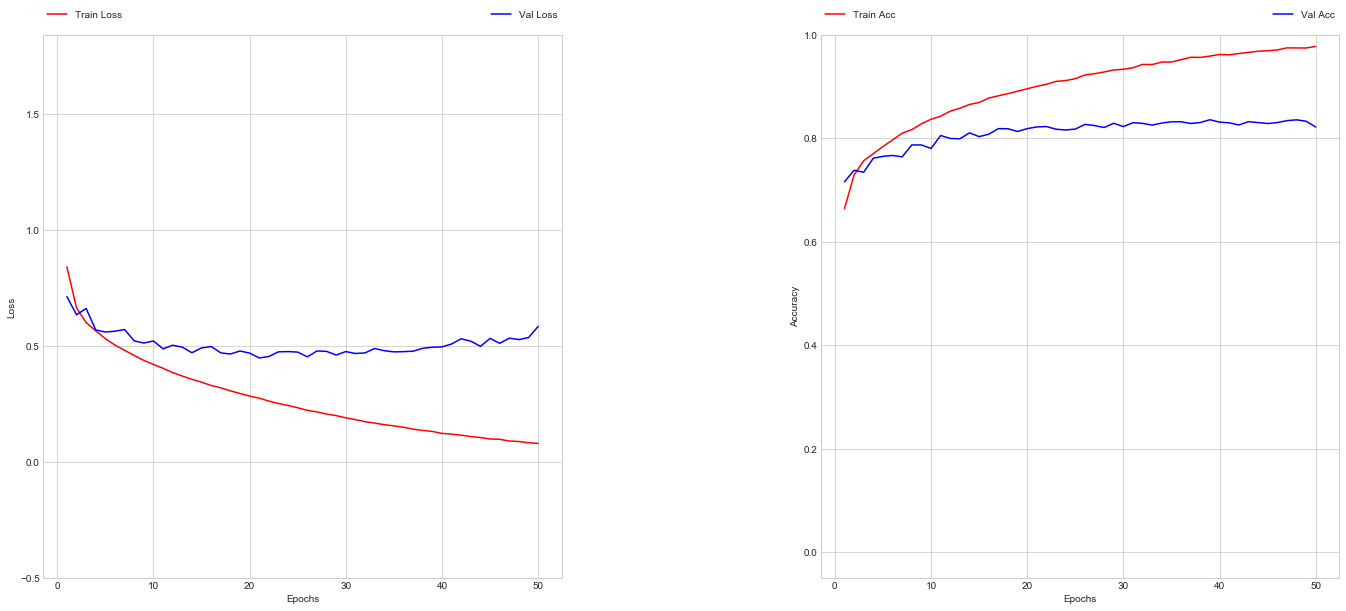

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
    
train_epochs = train_history['train_epochs']
train_loss = train_history['train_loss']
train_acc = train_history['train_acc']

val_epochs = val_history['val_epochs']
val_loss = val_history['val_loss']
val_acc = val_history['val_acc']


plt.figure(num=1, figsize=(20, 10),  facecolor='w', edgecolor='k')
plt.subplots_adjust(left = 0.05, right= 0.95, wspace=0.5, )

# Beginn des plottens:
plt.style.use('seaborn-whitegrid')
plt.subplot(121)

# Plot Axes-Labeling
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot range of y-axes
plt.gca().set_ylim([-0.5, train_loss[0]+1])

# Plot Curve
plt.plot(train_epochs, train_loss, 'r', label="Train Loss")
plt.plot(train_epochs, val_loss, 'b', label="Val Loss")

# Plot Legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
# plt.show()


plt.subplot(122)

# Plot Axes-Labeling# Plot Legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot range of y-axes
plt.gca().set_ylim([-0.05, 1.0])

# Plot Curve
plt.plot(val_epochs, train_acc, 'r', label="Train Acc")
plt.plot(val_epochs, val_acc, 'b', label="Val Acc")

# Plot Legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()



In [ ]:
"""
Here you can see overfiting. A meaningful number of epochs could be around 20. All epochs > 20 produce a larger 
train loss, than the loss by epoch 20.

Notice, preprocessing the data is very useful, because without normalization we have to train around 300 epochs to get
a compareable result (we tested this, but we delete the huge output). With preprocessing 20 epochs are enough.
"""